The idea is that, we feed the rgb image's 3 channel with the random channel of the hsi image to train a conditional classifier

In [1]:
import os
import h5py
import numpy as np
from PIL import Image

In [2]:
def readRgbImage(imgPath):
    # reads an RGB image and returns the numpy array
    with open(imgPath, 'rb') as f:
            img = Image.open(f)
            data = np.array(img.convert('RGB'))
            
    return data

In [3]:
def readHsiImage(imgPath):
    #reads an HSI image and returns all the channels required as a numpy array
    with h5py.File(imgPath, 'r') as f:
            data = f[HDF5_DATASET_NAME][:]
            
    return data

def saveHsiImage(data, imgPath):
    hf = h5py.File(imgPath, 'w')
    hf.create_dataset('hs_data', data=data)
    hf.close()

In [4]:
def normalizeMinusOneToOne(data):
    data /= (data.max() - data.min() + 0.0001)  
    data *= 2
    data -= 1
    return data

# 10 Channels

## Augment Test Data

note: some files in a subdataset have the exention \_RealWorld over their hsi pairs. so use the command line argument:
```rename '_RealWorld' '' *```
to remove it in both train and test datasets

In [5]:
HDF5_DATASET_NAME = 'hs_data'
INPUT_CHANNELS = [2,5,8,11,14,17,20,23,26,29]

input_hsi_dir = os.path.join('dataset', 'HsiRgbData', 'testB')
input_rgb_dir = os.path.join('dataset', 'HsiRgbData', 'testA')
hsi_image_list = sorted(os.listdir(input_hsi_dir))
rgb_image_list = sorted(os.listdir(input_rgb_dir))
hsiPaths = sorted([os.path.join(input_hsi_dir, f) for f in hsi_image_list if f.endswith('hdf5')])
rgbPaths = sorted([os.path.join(input_rgb_dir, f) for f in rgb_image_list if f.endswith('jpg')])

assert(len(hsiPaths) == len(rgbPaths))
for i in range(len(hsi_image_list)):
    # make sure all the hsi images have corresponding rgb images
    assert(hsi_image_list[i].split('.')[0] == rgb_image_list[i].split('.')[0]) 

In [6]:
# augment and store data:


print("Processing:", end=" ")

for i in range(len(hsiPaths)):
    
    
    hsiData = readHsiImage(hsiPaths[i]).astype(np.float32) # we change from float64, only change is number of values after decimal is changed from 12 to 4
    rgbData = readRgbImage(rgbPaths[i]).astype(np.float32)
    nHsiData = normalizeMinusOneToOne(hsiData)
    nRgbData = normalizeMinusOneToOne(rgbData)
    
    for c in range(len(INPUT_CHANNELS)):
        saveFileName = "{:0>2d}".format(c)+"_"+hsiPaths[i].split('/')[-1]
        savePath = os.path.join('dataset', 'ConditionalHsiData10', 'test', saveFileName)
        
        saveData = np.append(nRgbData, nHsiData[:, :, [INPUT_CHANNELS[c]]], axis=2)
        
        saveHsiImage(saveData, savePath)
        
    print(".", end="")


Processing: ........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

## Augment Training Data

In [7]:
HDF5_DATASET_NAME = 'hs_data'
INPUT_CHANNELS = [2,5,8,11,14,17,20,23,26,29]

input_hsi_dir = os.path.join('dataset', 'HsiRgbData', 'trainB')
input_rgb_dir = os.path.join('dataset', 'HsiRgbData', 'trainA')
hsi_image_list = sorted(os.listdir(input_hsi_dir))
rgb_image_list = sorted(os.listdir(input_rgb_dir))
hsiPaths = sorted([os.path.join(input_hsi_dir, f) for f in hsi_image_list if f.endswith('hdf5')])
rgbPaths = sorted([os.path.join(input_rgb_dir, f) for f in rgb_image_list if f.endswith('jpg')])

assert(len(hsiPaths) == len(rgbPaths))
for i in range(len(hsi_image_list)):
    # make sure all the hsi images have corresponding rgb images
    assert(hsiPaths[i].split('/')[-1].split('.')[0] == rgbPaths[i].split('/')[-1].split('.')[0]) 

In [8]:
# augment and store data:


print("Processing:", end=" ")

for i in range(len(hsiPaths)):
    
    
    hsiData = readHsiImage(hsiPaths[i]).astype(np.float32) # we change from float64, only change is number of values after decimal is changed from 12 to 4
    rgbData = readRgbImage(rgbPaths[i]).astype(np.float32)
    nHsiData = normalizeMinusOneToOne(hsiData)
    nRgbData = normalizeMinusOneToOne(rgbData)
    
    for c in range(len(INPUT_CHANNELS)):
        saveFileName = "{:0>2d}".format(c)+"_"+hsiPaths[i].split('/')[-1]
        savePath = os.path.join('dataset', 'ConditionalHsiData10', 'train', saveFileName)
        
        saveData = np.append(nRgbData, nHsiData[:, :, [INPUT_CHANNELS[c]]], axis=2)
        
        saveHsiImage(saveData, savePath)
        
    print(".", end="")

Processing: ............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

## View the data:

In [9]:
def denormalize(data):
    data+=1
    data/=2
    data *= 255/(data.max() + 0.0001)
    
    data = np.uint8(data)
    
    return data

In [78]:
HDF5_DATASET_NAME = 'hs_data'
INPUT_CHANNELS = [2,5,8,11,14,17,20,23,26,29]

save_directory = os.path.join('dataset', 'ConditionalHsiData10', 'train')
train_files = os.listdir(save_directory)
train_files_paths = sorted([os.path.join(save_directory, f) for f in train_files if f.endswith('hdf5')])

i = 22

current_file_path = train_files_paths[i]
data = readHsiImage(current_file_path)
rgbData = data[:, :, :3]
hsiData = data[:, :, [3]]
for i in range(1,10):
    current_file_path = current_file_path.split('/')
    current_file_path[-1] = "{:0>2d}".format(i) + '_' +  current_file_path[-1][3:]
    current_file_path = '/'.join(current_file_path)
    data = readHsiImage(current_file_path)
    hsiData = np.append(hsiData, data[:, :, [3]], axis=2)
    
rgbData = denormalize(rgbData)
hsiData = denormalize(hsiData)

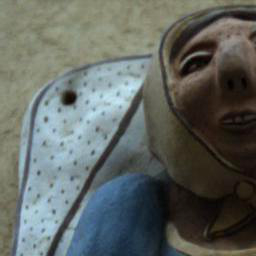

In [79]:
#rgb image:
Image.fromarray(rgbData)

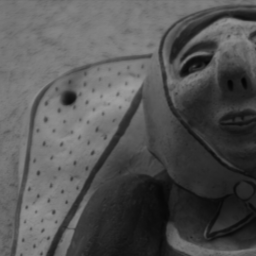

In [80]:
#hsi image:
hsiClass = 9
focusChannel = hsiData[:, :, hsiClass]
Image.fromarray(focusChannel, mode='L')

# 6 Channels

## Augment test Data

In [5]:
HDF5_DATASET_NAME = 'hs_data'
INPUT_CHANNELS = [3, 8, 13, 18, 23, 28]

input_hsi_dir = os.path.join('dataset', 'HsiRgbData', 'testB')
input_rgb_dir = os.path.join('dataset', 'HsiRgbData', 'testA')
hsi_image_list = sorted(os.listdir(input_hsi_dir))
rgb_image_list = sorted(os.listdir(input_rgb_dir))
hsiPaths = sorted([os.path.join(input_hsi_dir, f) for f in hsi_image_list if f.endswith('hdf5')])
rgbPaths = sorted([os.path.join(input_rgb_dir, f) for f in rgb_image_list if f.endswith('jpg')])

assert(len(hsiPaths) == len(rgbPaths))
for i in range(len(hsi_image_list)):
    # make sure all the hsi images have corresponding rgb images
    assert(hsi_image_list[i].split('.')[0] == rgb_image_list[i].split('.')[0]) 

In [7]:
# augment and store data:


print("Processing:", end=" ")

for i in range(len(hsiPaths)):
    
    
    hsiData = readHsiImage(hsiPaths[i]).astype(np.float32) # we change from float64, only change is number of values after decimal is changed from 12 to 4
    rgbData = readRgbImage(rgbPaths[i]).astype(np.float32)
    nHsiData = normalizeMinusOneToOne(hsiData)
    nRgbData = normalizeMinusOneToOne(rgbData)
    
    for c in range(len(INPUT_CHANNELS)):
        saveFileName = "{:0>2d}".format(c)+"_"+hsiPaths[i].split('/')[-1]
        savePath = os.path.join('dataset', 'ConditionalHsiData6', 'test', saveFileName)
        
        saveData = np.append(nRgbData, nHsiData[:, :, [INPUT_CHANNELS[c]]], axis=2)
        
        saveHsiImage(saveData, savePath)
        
    print(".", end="")

Processing: ........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

## Augment Training Data

In [8]:
HDF5_DATASET_NAME = 'hs_data'
INPUT_CHANNELS = [3, 8, 13, 18, 23, 28]

input_hsi_dir = os.path.join('dataset', 'HsiRgbData', 'trainB')
input_rgb_dir = os.path.join('dataset', 'HsiRgbData', 'trainA')
hsi_image_list = sorted(os.listdir(input_hsi_dir))
rgb_image_list = sorted(os.listdir(input_rgb_dir))
hsiPaths = sorted([os.path.join(input_hsi_dir, f) for f in hsi_image_list if f.endswith('hdf5')])
rgbPaths = sorted([os.path.join(input_rgb_dir, f) for f in rgb_image_list if f.endswith('jpg')])

assert(len(hsiPaths) == len(rgbPaths))
for i in range(len(hsi_image_list)):
    # make sure all the hsi images have corresponding rgb images
    assert(hsiPaths[i].split('/')[-1].split('.')[0] == rgbPaths[i].split('/')[-1].split('.')[0]) 

In [9]:
# augment and store data:


print("Processing:", end=" ")

for i in range(len(hsiPaths)):
    
    
    hsiData = readHsiImage(hsiPaths[i]).astype(np.float32) # we change from float64, only change is number of values after decimal is changed from 12 to 4
    rgbData = readRgbImage(rgbPaths[i]).astype(np.float32)
    nHsiData = normalizeMinusOneToOne(hsiData)
    nRgbData = normalizeMinusOneToOne(rgbData)
    
    for c in range(len(INPUT_CHANNELS)):
        saveFileName = "{:0>2d}".format(c)+"_"+hsiPaths[i].split('/')[-1]
        savePath = os.path.join('dataset', 'ConditionalHsiData6', 'train', saveFileName)
        
        saveData = np.append(nRgbData, nHsiData[:, :, [INPUT_CHANNELS[c]]], axis=2)
        
        saveHsiImage(saveData, savePath)
        
    print(".", end="")

Processing: ............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................